In [2]:
import pandas as pd
import numpy as np
import requests
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
warnings.filterwarnings('ignore')

In [3]:
def load_data(target_url = None, max_req_data_size = 1000, req_data = None, progress = True):
    data_size = len(req_data)
    last_req_data_size = data_size % max_req_data_size
    num_send_req = int(np.ceil(data_size / max_req_data_size))
    data = {'id': [], 'text': []}
    
    for i in range(0, num_send_req - 1):
        start_i = i * max_req_data_size
        end_i = start_i + last_req_data_size if i == (num_send_req - 2) and last_req_data_size != 0 else start_i + max_req_data_size 
        
        response_data = json.loads(requests.post(target_url, json = list(req_data[start_i: end_i])).text)
        data['id'].extend(response_data.keys())
        data['text'].extend(response_data.values())
        
        if progress:
            progress_num =  int(i * 100 / num_send_req) 
            print(f'Progress: {progress_num + 1}%', end = '\r')
        # End if
    # End of for
    
    return pd.DataFrame(data)
# End Func

In [4]:
data_path = './data/dialect_dataset.csv'
target_url = 'https://recruitment.aimtechnologies.co/ai-tasks'
max_req_data_size = 1000

In [5]:
df = pd.read_csv(data_path).astype({'id': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  object
 1   dialect  458197 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


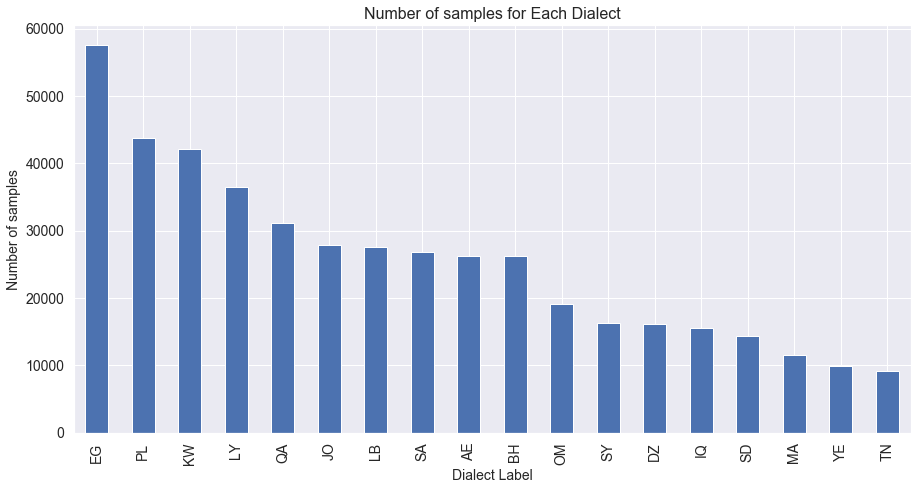

In [6]:
df['dialect'].value_counts().plot.bar(figsize = [15, 7.5], fontsize = 14)
plt.title('Number of samples for Each Dialect', fontsize = 16)
plt.xlabel('Dialect Label', fontsize = 14)
plt.ylabel('Number of samples', fontsize = 14)
plt.show()

In [7]:
loaded_data = load_data(target_url = target_url, max_req_data_size=max_req_data_size, req_data = df['id'].values)

In [8]:
df = loaded_data.join(df.set_index('id'), on = 'id')

In [9]:
df.head()

,id,text,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [10]:
df.tail()

,id,text,dialect
457192,733010187552952320,@lulwabuhsyeen يا سلام خوش مكان 👍,BH
457193,733090615991369728,اشتقت له بس ماودي احاكيه\nابيه من كيفه ي ح ن و...,BH
457194,733091262539149312,لـو قآلـو الناس مثله بـ العرب واجد\nبقـول محد ...,BH
457195,733092260871561216,❀♩ \n\nحلو المسآ لا صار يجمع لك اثنين\nق...,BH
457196,733104253485654016,@lulwabuhsyeen الحين طارت الطياره طارت طارت ال...,BH


In [11]:
df.to_csv('./data/dialects_data_full.csv', index=False)